In [1]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

# Dependencies

In [2]:
pacman::p_load(dplyr, ggplot2, ggbeeswarm, ggpubr, ggsignif, cowplot, lsmeans, forestplot)

# Functions

In [3]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

In [4]:
basespiderplot.fx <- function(mydf, varx,vary, clrby, colpal) {

    p0 <- ggplot(
        mydf,
        aes(x = eval(parse(text = varx)), y = eval(parse(text = vary)))
    ) +
        geom_point(aes(color = eval(parse(text = clrby))), cex = 2) +
        geom_line(aes(group = Patient, color = eval(parse(text = clrby)))) +
        scale_color_manual(values = colpal) +
        myplot +
        myaxis +
        theme(
            axis.text.x = element_text(angle = 45, hjust = 1),
            axis.title.x = element_blank()
        )
    return(p0)
}


# Paths

In [5]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [6]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [7]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

# 

In [8]:
sample_df <- readr::read_rds( paste0(datapath, "int_sample_df.rds"))

In [9]:
table(sample_df$Relapse)


  0   1 
431 103 

In [10]:
table(meta_div$sampletype)


cfDNA  PBMC Tumor 
  274   558    18 

# 1- Quantrreg for each patient post-therapy

In [12]:
sample_df$cyclenum <- as.numeric(gsub("X0", "", sample_df$cycle) )

In [13]:
# split to 3 dataframes: one for flow one for tcr and ncr

tcr_df <- sample_df[ !is.na(sample_df$TRB), ]
flow_df <- sample_df[ !is.na(sample_df$CD3) & sample_df$CD3 > 0, ]
ncr_df <- flow_df[ !is.na(flow_df$`TIM3%`), ]

In [19]:
# remove X01
tcr_df <- tcr_df[ tcr_df$cycle != "X01", ]
flow_df <- flow_df[ flow_df$cycle != "X01", ]
ncr_df <- ncr_df[ ncr_df$cycle != "X01", ]

In [20]:
# minimum two samples in each dataframe

mytab <- table(tcr_df$Patient, tcr_df$cycle)
mytab <- mytab[rowSums(mytab == 1) >= 2, ] 
tcr_df_min2 <- tcr_df[tcr_df$Patient %in% rownames(mytab), ]

mytab <- table(flow_df$Patient, flow_df$cycle)
mytab <- mytab[rowSums(mytab == 1) >= 2, ] 
flow_df_min2 <- flow_df[flow_df$Patient %in% rownames(mytab), ]

mytab <- table(ncr_df$Patient, ncr_df$cycle)
mytab <- mytab[rowSums(mytab == 1) >= 2, ] 
ncr_df_min2 <- ncr_df[ncr_df$Patient %in% rownames(mytab), ]

In [21]:
tcr_df_min2

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,cfDNA_J_PC2,cfDNA_J_PC3,cfDNA_samplename,cfDNA_gliph_n,cfDNA_CMV,cfDNA_EBV,cfDNA_HCV,cfDNA_Flu,cfDNA_hs,cyclenum
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
320,CHP_323_03,CHP_323,X03,0.0,786.24,1,HR ALL,0.0,0,NA,...,-1.42025844,-1.04697016,Leukemia:CHP_323_X03-cfDNA,71,8,2,0,5,1,3
322,CHP_323_05,CHP_323,X05,0.0,979.50,1,HR ALL,0.0,0,NA,...,-1.03382807,0.68828218,Leukemia:CHP_323_X05-cfDNA,9,0,0,0,0,0,5
346,CHP_328_04,CHP_328,X04,0.0,130.82,7,SR ALL,0.0,0,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,4
347,CHP_328_05,CHP_328,X05,0.0,91.16,7,SR ALL,0.0,0,NA,...,0.09263065,0.06769804,Leukemia:CHP_328_X05-cfDNA,0,0,0,0,0,0,5
361,CHP_331_04,CHP_331,X04,0.0,0.00,5,SR ALL,0.0,0,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,4
362,CHP_331_05,CHP_331,X05,0.0,0.00,5,SR ALL,0.0,0,NA,...,0.96813035,1.08735349,Leukemia:CHP_331_X05-cfDNA,15,0,0,0,0,0,5
395,CHP_338_03,CHP_338,X03,16.8,329.29,13,AML,16.8,0,NA,...,0.10556553,-0.10383618,Leukemia:CHP_338_X03-cfDNA,4,0,0,0,0,0,3
396,CHP_338_04,CHP_338,X04,1.9,0.00,13,AML,1.9,0,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,4
397,CHP_338_05,CHP_338,X05,0.0,0.00,13,AML,0.0,0,NA,...,0.32598174,-0.20770317,Leukemia:CHP_338_X05-cfDNA,3,0,0,0,0,0,5


In [22]:
tcr_df_min2 <- tcr_df_min2 %>%
group_by(Patient) %>%
mutate(quantreg_log10shann = quantreg::rq(log10shann ~ cyclenum, tau = 0.5)$coef[2]  ) %>%
mutate(quantreg_gliph_n = quantreg::rq(gliph_n ~ cyclenum, tau = 0.5)$coef[2]  ) %>%
mutate(quantreg_V_PC1 = quantreg::rq( V_PC1 ~ cyclenum, tau = 0.5)$coef[2]  ) %>%
mutate(quantreg_J_PC1 = quantreg::rq( J_PC1 ~ cyclenum, tau = 0.5)$coef[2]  ) %>%
ungroup()

Warning message:
“There were 4 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_log10shann = quantreg::rq(log10shann ~ cyclenum, tau =
  0.5)$coef[2]`.
ℹ In group 7: `Patient = "CHP_343"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3 remaining warnings.”
Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_gliph_n = quantreg::rq(gliph_n ~ cyclenum, tau =
  0.5)$coef[2]`.
ℹ In group 10: `Patient = "CHP_347"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”
Warning message:
“There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_V_PC1 = quantreg::rq(V_PC1 ~ cyclenum, tau =
  0.5)$coef[2]`.
ℹ In group 7: `Patient = "CHP_343"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see th

In [23]:
ncr_df_min2 <- ncr_df_min2 %>%
group_by(Patient) %>%
mutate(quantreg_TIM = quantreg::rq(`TIM3%` ~ cyclenum, tau = 0.5)$coef[2] ) %>%
mutate(quantreg_LAG = quantreg::rq(`LAG3%` ~ cyclenum, tau = 0.5)$coef[2]  ) %>%
mutate(quantreg_PD1 = quantreg::rq( `PD1%` ~ cyclenum, tau = 0.5)$coef[2]  ) %>%
ungroup()

Warning message:
“There were 4 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_TIM = quantreg::rq(`TIM3%` ~ cyclenum, tau =
  0.5)$coef[2]`.
ℹ In group 3: `Patient = "CHP_343"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3 remaining warnings.”
Warning message:
“There were 6 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_LAG = quantreg::rq(`LAG3%` ~ cyclenum, tau =
  0.5)$coef[2]`.
ℹ In group 3: `Patient = "CHP_343"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 5 remaining warnings.”
Warning message:
“There were 4 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_PD1 = quantreg::rq(`PD1%` ~ cyclenum, tau =
  0.5)$coef[2]`.
ℹ In group 3: `Patient = "CHP_343"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3 remaining w

In [24]:
flow_df_min2 <- flow_df_min2 %>%
group_by(Patient) %>%
mutate(quantreg_N = quantreg::rq(`Naïve%` ~ cyclenum, tau = 0.5)$coef[2] ) %>%
mutate(quantreg_CM = quantreg::rq(`CM%` ~ cyclenum, tau = 0.5)$coef[2]  ) %>%
mutate(quantreg_SCM = quantreg::rq( `SCM%` ~ cyclenum, tau = 0.5)$coef[2]  ) %>%
mutate(quantreg_EM = quantreg::rq( `EM%` ~ cyclenum, tau = 0.5)$coef[2] ) %>%
mutate(quantreg_TE = quantreg::rq( `TE%` ~ cyclenum, tau = 0.5)$coef[2] ) %>%
ungroup()

Warning message:
“There were 5 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_N = quantreg::rq(`Naïve%` ~ cyclenum, tau =
  0.5)$coef[2]`.
ℹ In group 4: `Patient = "CHP_347"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 4 remaining warnings.”
Warning message:
“There were 7 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_CM = quantreg::rq(`CM%` ~ cyclenum, tau =
  0.5)$coef[2]`.
ℹ In group 2: `Patient = "CHP_332"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 6 remaining warnings.”
Warning message:
“There were 7 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_SCM = quantreg::rq(`SCM%` ~ cyclenum, tau =
  0.5)$coef[2]`.
ℹ In group 2: `Patient = "CHP_332"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 6 remaining warni

In [25]:
head(flow_df_min2)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,cfDNA_EBV,cfDNA_HCV,cfDNA_Flu,cfDNA_hs,cyclenum,quantreg_N,quantreg_CM,quantreg_SCM,quantreg_EM,quantreg_TE
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_343_02,CHP_343,X02,0.3,459.04,8,EWS,0.3,1135,16,...,0,0,0,0,2,0.410509,11.559121,-2.637709,1.6100152,-11.76164
CHP_343_03,CHP_343,X03,0.6,370.30,8,EWS,0.6,1650,16,...,NA,NA,NA,NA,3,0.410509,11.559121,-2.637709,1.6100152,-11.76164
CHP_343_04,CHP_343,X04,1.5,536.63,8,EWS,1.5,2612,146,...,0,0,0,0,4,0.410509,11.559121,-2.637709,1.6100152,-11.76164
CHP_343_05,CHP_343,X05,2.1,371.20,8,EWS,2.1,2436,152,...,0,0,0,0,5,0.410509,11.559121,-2.637709,1.6100152,-11.76164
CHP_347_02,CHP_347,X02,6.4,1038.59,13,ALL,6.4,927,15,...,0,0,0,0,2,-2.401567,-2.436335,-4.376147,-0.4320946,10.60874
CHP_347_03,CHP_347,X03,37.6,768.80,13,ALL,37.6,2379,27,...,0,0,0,0,3,-2.401567,-2.436335,-4.376147,-0.4320946,10.60874


In [26]:
flow_df_min2_pt <- flow_df_min2[ !duplicated(flow_df_min2$Patient), ]
ncr_df_min2_pt <- ncr_df_min2[ !duplicated(ncr_df_min2$Patient), ]
tcr_df_min2_pt <- tcr_df_min2[ !duplicated(tcr_df_min2$Patient), ]

In [28]:
# merge all the dataframes, allow NAs to include all data
df_min2_pt <- merge(flow_df_min2_pt, ncr_df_min2_pt, by = c("Patient", "cancergroup"), all = TRUE)
df_min2_pt <- merge(df_min2_pt, tcr_df_min2_pt, by = c("Patient", "cancergroup"), all = TRUE)

In [29]:
head(df_min2_pt)

,Patient,cancergroup,sample_id.x,cycle.x,FOLD.x,ATC.x,Age.x,Disease_type.x,TE_fold.x,CD3.x,...,cfDNA_CMV,cfDNA_EBV,cfDNA_HCV,cfDNA_Flu,cfDNA_hs,cyclenum,quantreg_log10shann,quantreg_gliph_n,quantreg_V_PC1,quantreg_J_PC1
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CHP_323,Leukemia,NA,NA,NA,NA,NA,NA,NA,NA,...,8,2,0,5,1,3,0.16795449,38.0,-1.0999588,-0.6480772
2,CHP_328,Leukemia,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,4,-0.40863852,-202.0,6.1350461,3.3680829
3,CHP_330,Solid tumors,CHP_330_02,X02,1.9,0,5,OS,1.9,2425,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,CHP_331,Leukemia,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,4,0.58641184,65.0,-2.5296036,-1.1611760
5,CHP_332,Solid tumors,CHP_332_02,X02,NA,0,10,ERMS,NA,2403,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,CHP_338,Leukemia,NA,NA,NA,NA,NA,NA,NA,NA,...,0,0,0,0,0,3,-0.08296783,-55.5,0.9630268,0.2691643


In [ ]:
# df_min2_pt$quantreg_gliph_n <- NULL

In [30]:
mycol <- colnames(df_min2_pt)[grepl("quantreg", colnames(df_min2_pt))]

In [31]:
mycol

[1] "quantreg_N"          "quantreg_CM"         "quantreg_SCM"       
 [4] "quantreg_EM"         "quantreg_TE"         "quantreg_TIM"       
 [7] "quantreg_LAG"        "quantreg_PD1"        "quantreg_log10shann"
[10] "quantreg_gliph_n"    "quantreg_V_PC1"      "quantreg_J_PC1"

In [32]:
# scale
for(i in mycol){
    newvar <- paste0(i, "_scaled")
df_min2_pt[[newvar]] <- as.vector(scale(df_min2_pt[[i]]))
}

In [33]:
head(df_min2_pt)

,Patient,cancergroup,sample_id.x,cycle.x,FOLD.x,ATC.x,Age.x,Disease_type.x,TE_fold.x,CD3.x,...,quantreg_SCM_scaled,quantreg_EM_scaled,quantreg_TE_scaled,quantreg_TIM_scaled,quantreg_LAG_scaled,quantreg_PD1_scaled,quantreg_log10shann_scaled,quantreg_gliph_n_scaled,quantreg_V_PC1_scaled,quantreg_J_PC1_scaled
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CHP_323,Leukemia,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,0.3130091,0.2154110,-0.1989787,-0.20613074
2,CHP_328,Leukemia,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,-0.7304174,-1.1991813,1.1426368,1.13146015
3,CHP_330,Solid tumors,CHP_330_02,X02,1.9,0,5,OS,1.9,2425,...,-0.5188160,0.5144267,-0.1805472,-0.8705364,-0.8010621,-0.8466554,NA,NA,NA,NA
4,CHP_331,Leukemia,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,1.0702668,0.3745526,-0.4640834,-0.37701941
5,CHP_332,Solid tumors,CHP_332_02,X02,NA,0,10,ERMS,NA,2403,...,-0.6725684,0.2626084,0.2305255,-0.8720151,0.4658794,-0.8481162,NA,NA,NA,NA
6,CHP_338,Leukemia,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,-0.1410702,-0.3356906,0.1835688,0.09935853


In [34]:
mycol <- colnames(df_min2_pt)[grepl("scaled", colnames(df_min2_pt))]

In [35]:
mycol

[1] "quantreg_N_scaled"          "quantreg_CM_scaled"        
 [3] "quantreg_SCM_scaled"        "quantreg_EM_scaled"        
 [5] "quantreg_TE_scaled"         "quantreg_TIM_scaled"       
 [7] "quantreg_LAG_scaled"        "quantreg_PD1_scaled"       
 [9] "quantreg_log10shann_scaled" "quantreg_gliph_n_scaled"   
[11] "quantreg_V_PC1_scaled"      "quantreg_J_PC1_scaled"

In [37]:
# quick test
for(i in mycol){
    message(i)
    print(pairwise.wilcox.test(df_min2_pt[[i]], df_min2_pt$cancergroup, p.adj = "bonferroni", paired = FALSE, alternative = "two.sided"))
}

quantreg_N_scaled




	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  df_min2_pt[[i]] and df_min2_pt$cancergroup 

                    Leukemia Lymphoma Solid tumors
Lymphoma            1.00     -        -           
Solid tumors        0.04     0.24     -           
T-cell malignancies 1.00     1.00     1.00        

P value adjustment method: bonferroni 


quantreg_CM_scaled




	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  df_min2_pt[[i]] and df_min2_pt$cancergroup 

                    Leukemia Lymphoma Solid tumors
Lymphoma            0.60     -        -           
Solid tumors        1.00     0.15     -           
T-cell malignancies 0.67     1.00     0.63        

P value adjustment method: bonferroni 


quantreg_SCM_scaled




	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  df_min2_pt[[i]] and df_min2_pt$cancergroup 

                    Leukemia Lymphoma Solid tumors
Lymphoma            1        -        -           
Solid tumors        1        1        -           
T-cell malignancies 1        1        1           

P value adjustment method: bonferroni 


quantreg_EM_scaled




	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  df_min2_pt[[i]] and df_min2_pt$cancergroup 

                    Leukemia Lymphoma Solid tumors
Lymphoma            1        -        -           
Solid tumors        1        1        -           
T-cell malignancies 1        1        1           

P value adjustment method: bonferroni 


quantreg_TE_scaled




	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  df_min2_pt[[i]] and df_min2_pt$cancergroup 

                    Leukemia Lymphoma Solid tumors
Lymphoma            0.78     -        -           
Solid tumors        1.00     0.75     -           
T-cell malignancies 1.00     1.00     0.63        

P value adjustment method: bonferroni 


quantreg_TIM_scaled




	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  df_min2_pt[[i]] and df_min2_pt$cancergroup 

                    Leukemia Lymphoma Solid tumors
Lymphoma            0.48     -        -           
Solid tumors        1.00     0.81     -           
T-cell malignancies 0.75     1.00     1.00        

P value adjustment method: bonferroni 


quantreg_LAG_scaled




	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  df_min2_pt[[i]] and df_min2_pt$cancergroup 

                    Leukemia Lymphoma Solid tumors
Lymphoma            1.00     -        -           
Solid tumors        1.00     1.00     -           
T-cell malignancies 0.75     1.00     0.67        

P value adjustment method: bonferroni 


quantreg_PD1_scaled




	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  df_min2_pt[[i]] and df_min2_pt$cancergroup 

                    Leukemia Lymphoma Solid tumors
Lymphoma            0.48     -        -           
Solid tumors        1.00     0.70     -           
T-cell malignancies 0.75     1.00     1.00        

P value adjustment method: bonferroni 


quantreg_log10shann_scaled




	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  df_min2_pt[[i]] and df_min2_pt$cancergroup 

                    Leukemia Lymphoma Solid tumors
Lymphoma            0.43     -        -           
Solid tumors        1.00     1.00     -           
T-cell malignancies 0.85     1.00     1.00        

P value adjustment method: bonferroni 


quantreg_gliph_n_scaled




	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  df_min2_pt[[i]] and df_min2_pt$cancergroup 

                    Leukemia Lymphoma Solid tumors
Lymphoma            1        -        -           
Solid tumors        1        1        -           
T-cell malignancies 1        1        1           

P value adjustment method: bonferroni 


quantreg_V_PC1_scaled




	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  df_min2_pt[[i]] and df_min2_pt$cancergroup 

                    Leukemia Lymphoma Solid tumors
Lymphoma            1.00     -        -           
Solid tumors        1.00     1.00     -           
T-cell malignancies 0.85     1.00     1.00        

P value adjustment method: bonferroni 


quantreg_J_PC1_scaled




	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  df_min2_pt[[i]] and df_min2_pt$cancergroup 

                    Leukemia Lymphoma Solid tumors
Lymphoma            1        -        -           
Solid tumors        1        1        -           
T-cell malignancies 1        1        1           

P value adjustment method: bonferroni 


In [38]:
table(df_min2_pt$cancergroup)


           Leukemia            Lymphoma        Solid tumors T-cell malignancies 
                 31                  10                  23                   2 

In [39]:
df_min2_pt_long <- tidyr::pivot_longer(df_min2_pt, all_of(mycol), names_to = "Feature", values_to = "Quantreg")

In [40]:
df_min2_pt_long <- as.data.frame(df_min2_pt_long)

In [41]:
df_min2_pt_long_narm <- df_min2_pt_long[ !is.na(df_min2_pt_long$Quantreg),]

Boxplot

In [42]:
# use scaled for viz
df_min2_pt_long_narm$Featurename <- gsub("_scaled", "", df_min2_pt_long_narm$Feature)
df_min2_pt_long_narm$Featurename <- gsub("quantreg_", "", df_min2_pt_long_narm$Featurename)

In [43]:
table(df_min2_pt_long_narm$cancergroup)


           Leukemia            Lymphoma        Solid tumors T-cell malignancies 
                230                  89                 197                  16 

In [44]:
p1 <- ggplot(df_min2_pt_long_narm, aes(y = Featurename, x = Quantreg)) +  geom_point(aes( color = cancergroup), position = position_jitter(w = 0.05, h = 0.15)) +
        geom_boxplot(outlier.shape = NA, alpha = 0, color = "#b7b2b2") + myaxis + myplot + scale_color_manual(values = group_col)

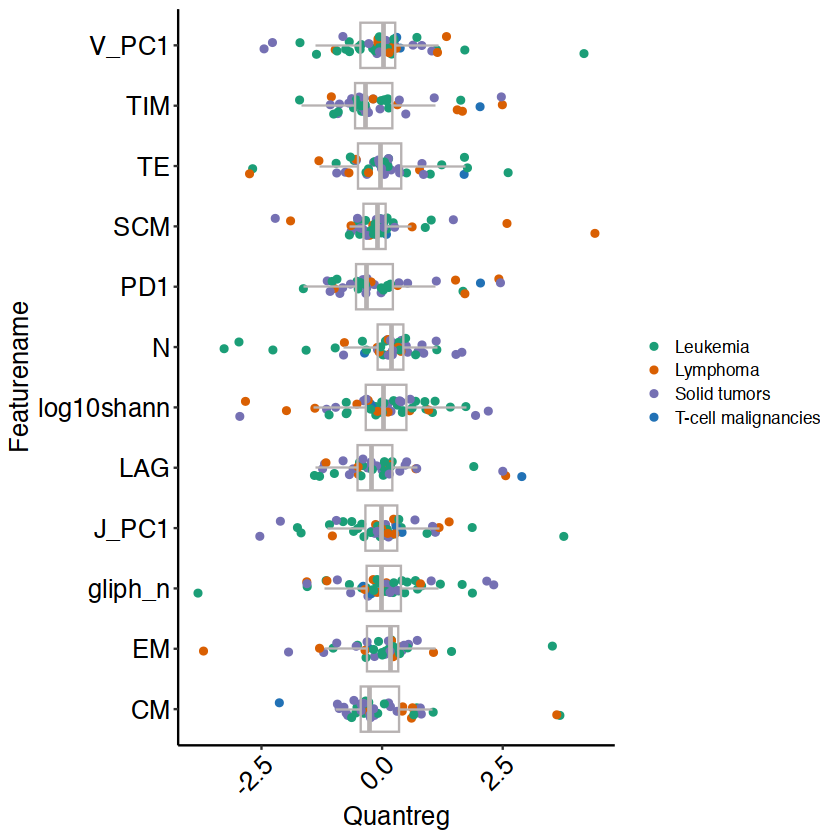

In [45]:
p1

In [47]:
pdf( paste0(plotpath, "quantreq.pdf"), width = 6, height = 8)
p1 + theme(legend.position = "bottom")
dev.off()

pdf 
  2

LR and forestplot

Use unscaled data for glm

In [48]:
mycol <- colnames(df_min2_pt)[grepl("quantreg", colnames(df_min2_pt))]

In [49]:
mycol <- mycol[ !grepl("scaled", mycol)]

In [50]:
mycol

[1] "quantreg_N"          "quantreg_CM"         "quantreg_SCM"       
 [4] "quantreg_EM"         "quantreg_TE"         "quantreg_TIM"       
 [7] "quantreg_LAG"        "quantreg_PD1"        "quantreg_log10shann"
[10] "quantreg_gliph_n"    "quantreg_V_PC1"      "quantreg_J_PC1"

In [51]:
df_min2_pt_long <- tidyr::pivot_longer(df_min2_pt, all_of(mycol), names_to = "Feature", values_to = "Quantreg")

In [52]:
df_min2_pt_long <- as.data.frame(df_min2_pt_long)

In [53]:
df_min2_pt_long_narm <- df_min2_pt_long[ !is.na(df_min2_pt_long$Quantreg),]

In [67]:
feat_lr_mat <- matrix(nrow = length(unique(df_min2_pt_long_narm$Feature)), ncol = 7)
rownames(feat_lr_mat) <- unique(df_min2_pt_long_narm$Feature)
colnames(feat_lr_mat) <- c('coef', 'exp(coef)', 'SE', 'z', 'Pr(>|z|)', 'lower.95' ,'upper.95')

In [68]:
feat_lr_mat

,coef,exp(coef),SE,z,Pr(>|z|),lower.95,upper.95
quantreg_log10shann,NA,NA,NA,NA,NA,NA,NA
quantreg_gliph_n,NA,NA,NA,NA,NA,NA,NA
quantreg_V_PC1,NA,NA,NA,NA,NA,NA,NA
quantreg_J_PC1,NA,NA,NA,NA,NA,NA,NA
quantreg_N,NA,NA,NA,NA,NA,NA,NA
quantreg_CM,NA,NA,NA,NA,NA,NA,NA
quantreg_SCM,NA,NA,NA,NA,NA,NA,NA
quantreg_EM,NA,NA,NA,NA,NA,NA,NA
quantreg_TE,NA,NA,NA,NA,NA,NA,NA
quantreg_TIM,NA,NA,NA,NA,NA,NA,NA


In [70]:
for(i in rownames(feat_lr_mat)){
   # message(i)
    f <- as.formula(paste0("Relapse~", i,"*cancergroup"))  
    lrmodel <- glm(f, data=df_min2_pt, family = "binomial") 
    sumlrmodel <- summary(lrmodel)
#print(sumlrmodel)
    myCI <- exp(confint.default(lrmodel, level = 0.95) )

    feat_lr_mat[i,"coef"] <- sumlrmodel$coefficients[2,"Estimate"]
    # exp of estimate is the odds ratio
    feat_lr_mat[i,"exp(coef)"] <- exp(sumlrmodel$coefficients[2,"Estimate"])
    feat_lr_mat[i,"SE"] <- sumlrmodel$coefficients[2,"Std. Error"]
    feat_lr_mat[i,"z"] <- sumlrmodel$coefficients[2,"z value"]
    feat_lr_mat[i,"Pr(>|z|)"] <- sumlrmodel$coefficients[2,"Pr(>|z|)"]
    #from myCI
    feat_lr_mat[i,"lower.95"] <- myCI[2,1]
    feat_lr_mat[i,"upper.95"] <- myCI[2,2]
}

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [57]:
feat_lr_mat

,coef,exp(coef),SE,z,Pr(>|z|),lower.95,upper.95
quantreg_log10shann,-1.799746672,1.653408e-01,1.508834e+00,-1.192806027,0.2329453,0.00859128,3.182014
quantreg_gliph_n,-0.004335873,9.956735e-01,2.943168e-03,-1.473199406,0.1406973,0.98994650,1.001434
quantreg_V_PC1,0.120165089,1.127683e+00,8.579854e-02,1.400549313,0.1613489,0.95313668,1.334194
quantreg_J_PC1,0.221692301,1.248187e+00,1.562956e-01,1.418416521,0.1560692,0.91884163,1.695582
quantreg_N,0.032692743,1.033233e+00,4.813722e-02,0.679157230,0.4970382,0.94020769,1.135462
quantreg_CM,0.080564789,1.083899e+00,7.029465e-02,1.146101350,0.2517532,0.94439555,1.244010
quantreg_SCM,-0.208145343,8.120890e-01,2.282394e-01,-0.911960437,0.3617895,0.51918945,1.270227
quantreg_EM,18.362632352,9.436043e+07,7.225633e+03,0.002541318,0.9979723,0.00000000,Inf
quantreg_TE,-0.060318648,9.414645e-01,4.796152e-02,-1.257646593,0.2085196,0.85699644,1.034258
quantreg_TIM,0.044029606,1.045013e+00,1.376934e-01,0.319765665,0.7491460,0.79784223,1.368758


In [58]:
fdr_df <- as.matrix(p.adjust(feat_lr_mat[,5], method = "fdr"))
colnames(fdr_df)[1] <- "fdr"
feat_lr_mat <- cbind(feat_lr_mat, fdr_df)

In [59]:
feat_lr_mat <- as.data.frame(feat_lr_mat)

In [60]:
feat_lr_mat$Feature <- gsub("quantreg_", "", rownames(feat_lr_mat))

In [61]:
(feat_lr_mat)

,coef,exp(coef),SE,z,Pr(>|z|),lower.95,upper.95,fdr,Feature
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
quantreg_log10shann,-1.799746672,1.653408e-01,1.508834e+00,-1.192806027,0.2329453,0.00859128,3.182014,0.5035064,log10shann
quantreg_gliph_n,-0.004335873,9.956735e-01,2.943168e-03,-1.473199406,0.1406973,0.98994650,1.001434,0.5035064,gliph_n
quantreg_V_PC1,0.120165089,1.127683e+00,8.579854e-02,1.400549313,0.1613489,0.95313668,1.334194,0.5035064,V_PC1
quantreg_J_PC1,0.221692301,1.248187e+00,1.562956e-01,1.418416521,0.1560692,0.91884163,1.695582,0.5035064,J_PC1
quantreg_N,0.032692743,1.033233e+00,4.813722e-02,0.679157230,0.4970382,0.94020769,1.135462,0.6627177,N
quantreg_CM,0.080564789,1.083899e+00,7.029465e-02,1.146101350,0.2517532,0.94439555,1.244010,0.5035064,CM
quantreg_SCM,-0.208145343,8.120890e-01,2.282394e-01,-0.911960437,0.3617895,0.51918945,1.270227,0.6202106,SCM
quantreg_EM,18.362632352,9.436043e+07,7.225633e+03,0.002541318,0.9979723,0.00000000,Inf,0.9979723,EM
quantreg_TE,-0.060318648,9.414645e-01,4.796152e-02,-1.257646593,0.2085196,0.85699644,1.034258,0.5035064,TE


In [62]:
feat_lr_mat$mean <- feat_lr_mat$`exp(coef)`
feat_lr_mat$lower <- feat_lr_mat$`lower.95`
feat_lr_mat$upper <- feat_lr_mat$`upper.95`

In [63]:
feat_lr_mat$OR <- as.character(round(feat_lr_mat$`exp(coef)`, 2) )
feat_lr_mat$p <- as.character(round(feat_lr_mat$`Pr(>|z|)`, 2) )
feat_lr_mat$FDR <- as.character(round(feat_lr_mat$fdr, 2) )

In [64]:
p2 <- feat_lr_mat |>
  forestplot(
    labeltext = c(Feature, OR, p, FDR),
    clip = c(0, 2), 
    boxsize = 0.2,
    vertices = TRUE,
    xlog = FALSE, zero = 1
  ) |>
  fp_set_style(
    box = "royalblue",
    line = "darkblue",
    summary = "royalblue"
  ) |>
  fp_add_header(
    Feature = c("", "Feature"),
    OR = c("", "OR"),
    p = c("", "p value"),
    FDR = c("", "FDR")
  )


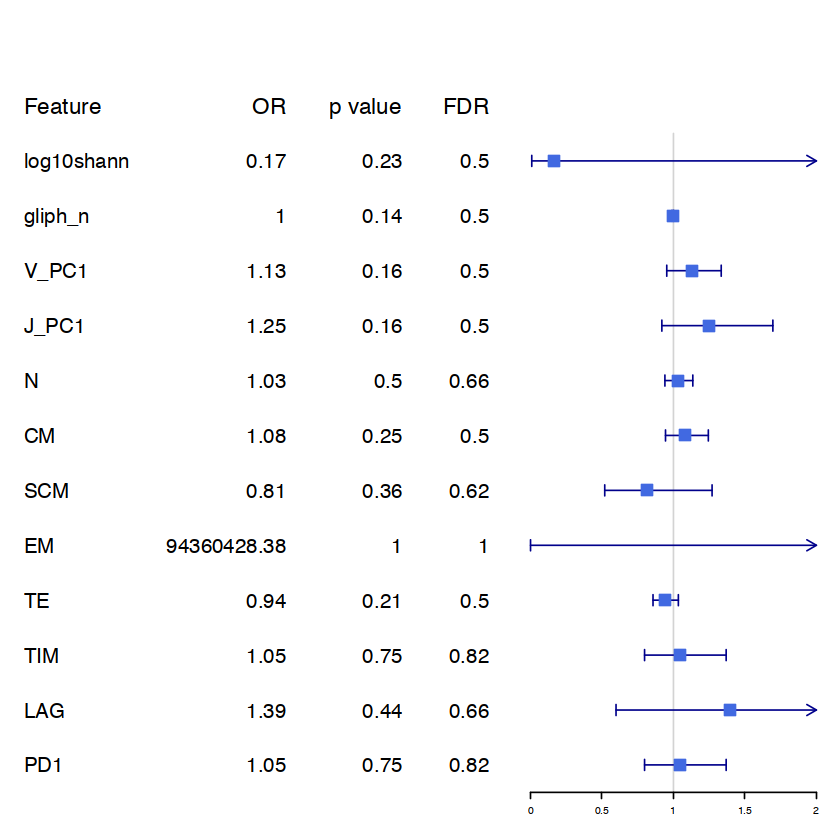

In [65]:
p2

In [66]:
pdf(paste0(plotpath, "forestplot_quantreq.pdf"), width=6, height=8)
p2
dev.off()

pdf 
  2

In [ ]:
pdf(file = paste0(plotpath,"Univar_forestplot.pdf"),
    width = 7, height = 10,
    useDingbats = FALSE, onefile = F)
forestplot(tabtext, hrs, new_page = TRUE, xlog = TRUE,
                   title = "Survival analysis (iMATRIX-atezo)(p-value, FDR)", boxsize = 0.25)
dev.off()

# 2- Baseline associations

In [71]:
sample_df$cyclenum <- as.numeric(gsub("X0", "", sample_df$cycle) )

In [72]:
# split to 3 dataframes: one for flow one for tcr and ncr

tcr_df <- sample_df[ !is.na(sample_df$TRB), ]
flow_df <- sample_df[ !is.na(sample_df$CD3) & sample_df$CD3 > 0, ]
ncr_df <- flow_df[ !is.na(flow_df$`TIM3%`), ]

In [73]:
# only X01
tcr_df <- tcr_df[ tcr_df$cycle == "X01", ]
flow_df <- flow_df[ flow_df$cycle == "X01", ]
ncr_df <- ncr_df[ ncr_df$cycle == "X01", ]

In [74]:
# merge all the dataframes, allow NAs to include all data
df_x01 <- merge(flow_df, ncr_df, by = c("Patient", "cancergroup"), all = TRUE)
df_x01 <- merge(df_x01, tcr_df, by = c("Patient", "cancergroup"), all = TRUE)

In [76]:
head(df_x01)

,Patient,cancergroup,sample_id.x,cycle.x,FOLD.x,ATC.x,Age.x,Disease_type.x,TE_fold.x,CD3.x,...,cfDNA_J_PC2,cfDNA_J_PC3,cfDNA_samplename,cfDNA_gliph_n,cfDNA_CMV,cfDNA_EBV,cfDNA_HCV,cfDNA_Flu,cfDNA_hs,cyclenum
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,...,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CHP_330,Solid tumors,CHP_330_01,X01,0.9,0.00,5,OS,0.9,2437,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,CHP_332,Solid tumors,CHP_332_01,X01,8.2,0.00,10,ERMS,8.2,3628,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,CHP_343,Solid tumors,CHP_343_01,X01,1.0,219.30,8,EWS,1.0,2421,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,CHP_346,Solid tumors,CHP_346_01,X01,0.8,331.70,1,NB,0.8,637,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,1
5,CHP_347,Leukemia,CHP_347_01,X01,0.8,126.72,13,ALL,0.8,1701,...,NA,NA,Leukemia:CHP_347_X01-cfDNA,0,0,0,0,0,0,1
6,CHP_348,Solid tumors,CHP_348_01,X01,11.5,50.96,18,OS,11.5,1125,...,-0.2093275,0.4005046,Solidtumors:CHP_348_X01-cfDNA,3,0,0,0,0,0,1


In [ ]:
# df_min2_pt$quantreg_gliph_n <- NULL

In [94]:
mycol <- c('EM%','CM%','Naïve%','SCM%','TE%', 'HLA_PC1','HLA_PC2','HLA_PC3','V_PC1','V_PC2','V_PC3','J_PC1','J_PC2', 'J_PC3','PD1%', 'TIM3%', 'LAG3%', 'log10shann', "gliph_n")

In [95]:
mycol

[1] "EM%"        "CM%"        "Naïve%"     "SCM%"       "TE%"       
 [6] "HLA_PC1"    "HLA_PC2"    "HLA_PC3"    "V_PC1"      "V_PC2"     
[11] "V_PC3"      "J_PC1"      "J_PC2"      "J_PC3"      "PD1%"      
[16] "TIM3%"      "LAG3%"      "log10shann" "gliph_n"

In [96]:
# scale
for(i in mycol){
    newvar <- paste0(i, "_scaled")
df_x01[[newvar]] <- as.vector(scale(df_x01[[i]]))
}

In [97]:
head(df_x01)

,Patient,cancergroup,sample_id.x,cycle.x,FOLD.x,ATC.x,Age.x,Disease_type.x,TE_fold.x,CD3.x,...,J_PC2_scaled,J_PC3_scaled,PD1%_scaled,TIM3%_scaled,LAG3%_scaled,log10shann_scaled,gliph_n_scaled,HLA_PC1_scaled,HLA_PC2_scaled,HLA_PC3_scaled
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CHP_330,Solid tumors,CHP_330_01,X01,0.9,0.00,5,OS,0.9,2437,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,CHP_332,Solid tumors,CHP_332_01,X01,8.2,0.00,10,ERMS,8.2,3628,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,CHP_343,Solid tumors,CHP_343_01,X01,1.0,219.30,8,EWS,1.0,2421,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,CHP_346,Solid tumors,CHP_346_01,X01,0.8,331.70,1,NB,0.8,637,...,0.3113542,-0.1837252,-0.6093947,-0.6093947,-0.6794029,-0.4068475,-0.7337679,0.7298768,-0.2962330,1.3535141
5,CHP_347,Leukemia,CHP_347_01,X01,0.8,126.72,13,ALL,0.8,1701,...,-0.6975843,0.2301137,0.8243495,0.8243495,-0.8599160,0.4157920,-0.1784009,0.2698844,0.9597934,0.7584671
6,CHP_348,Solid tumors,CHP_348_01,X01,11.5,50.96,18,OS,11.5,1125,...,0.4244381,0.5600971,-0.5822169,-0.5822169,-0.9676864,0.1473301,-0.4696299,0.8591286,1.5851285,-1.0393537


In [98]:
mycol <- colnames(df_x01)[grepl("scaled", colnames(df_x01))]

In [99]:
mycol

[1] "EM%_scaled"        "CM%_scaled"        "Naïve%_scaled"    
 [4] "SCM%_scaled"       "TE%_scaled"        "V_PC1_scaled"     
 [7] "V_PC2_scaled"      "V_PC3_scaled"      "J_PC1_scaled"     
[10] "J_PC2_scaled"      "J_PC3_scaled"      "PD1%_scaled"      
[13] "TIM3%_scaled"      "LAG3%_scaled"      "log10shann_scaled"
[16] "gliph_n_scaled"    "HLA_PC1_scaled"    "HLA_PC2_scaled"   
[19] "HLA_PC3_scaled"

In [100]:
table(df_x01$cancergroup)


           Leukemia            Lymphoma        Solid tumors T-cell malignancies 
                 30                  12                  27                   4 

In [101]:
df_x01_long <- tidyr::pivot_longer(df_x01, all_of(mycol), names_to = "Feature", values_to = "X01")

In [102]:
df_x01_long <- as.data.frame(df_x01_long)

In [103]:
df_x01_long_narm <- df_x01_long[ !is.na(df_x01_long$X01),]

In [104]:
head(df_x01_long_narm)

,Patient,cancergroup,sample_id.x,cycle.x,FOLD.x,ATC.x,Age.x,Disease_type.x,TE_fold.x,CD3.x,...,cfDNA_samplename,cfDNA_gliph_n,cfDNA_CMV,cfDNA_EBV,cfDNA_HCV,cfDNA_Flu,cfDNA_hs,cyclenum,Feature,X01
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,...,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
58,CHP_346,Solid tumors,CHP_346_01,X01,0.8,331.7,1,NB,0.8,637,...,NA,NA,NA,NA,NA,NA,NA,1,EM%_scaled,-0.6665081
59,CHP_346,Solid tumors,CHP_346_01,X01,0.8,331.7,1,NB,0.8,637,...,NA,NA,NA,NA,NA,NA,NA,1,CM%_scaled,-0.7547849
60,CHP_346,Solid tumors,CHP_346_01,X01,0.8,331.7,1,NB,0.8,637,...,NA,NA,NA,NA,NA,NA,NA,1,Naïve%_scaled,2.9439196
61,CHP_346,Solid tumors,CHP_346_01,X01,0.8,331.7,1,NB,0.8,637,...,NA,NA,NA,NA,NA,NA,NA,1,SCM%_scaled,-1.0708562
62,CHP_346,Solid tumors,CHP_346_01,X01,0.8,331.7,1,NB,0.8,637,...,NA,NA,NA,NA,NA,NA,NA,1,TE%_scaled,-1.7271353
63,CHP_346,Solid tumors,CHP_346_01,X01,0.8,331.7,1,NB,0.8,637,...,NA,NA,NA,NA,NA,NA,NA,1,V_PC1_scaled,0.7643520


Boxplot

In [105]:
# use scaled for viz
df_x01_long_narm$Featurename <- gsub("_scaled", "", df_x01_long_narm$Feature)

In [106]:
p1 <- ggplot(df_x01_long_narm, aes(y = Featurename, x = X01)) +  geom_point(aes( color = cancergroup), position = position_jitter(w = 0.05, h = 0.15)) +
        geom_boxplot(outlier.shape = NA, alpha = 0, color = "#b7b2b2") + myaxis + myplot + scale_color_manual(values = group_col)

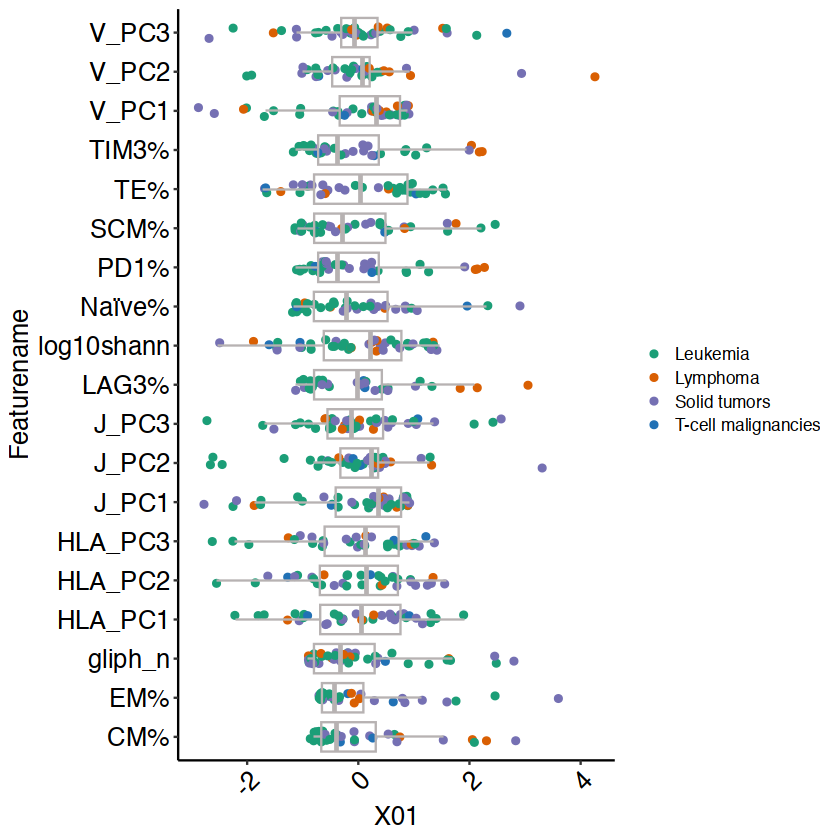

In [107]:
p1

In [108]:
pdf( paste0(plotpath, "X01.pdf"), width = 6, height = 8)
p1 + theme(legend.position = "bottom")
dev.off()

pdf 
  2

LR and forestplot

Use unscaled data for glm

In [111]:
mycol <- c('EM%','CM%','Naïve%','SCM%','TE%', 'HLA_PC1','HLA_PC2','HLA_PC3', 'V_PC1','V_PC2','V_PC3','J_PC1','J_PC2', 'J_PC3','PD1%', 'TIM3%', 'LAG3%', 'log10shann', "gliph_n")

In [112]:
mycol

[1] "EM%"        "CM%"        "Naïve%"     "SCM%"       "TE%"       
 [6] "HLA_PC1"    "HLA_PC2"    "HLA_PC3"    "V_PC1"      "V_PC2"     
[11] "V_PC3"      "J_PC1"      "J_PC2"      "J_PC3"      "PD1%"      
[16] "TIM3%"      "LAG3%"      "log10shann" "gliph_n"

In [113]:
df_x01_long <- tidyr::pivot_longer(df_x01, all_of(mycol), names_to = "Feature", values_to = "X01")

In [114]:
df_x01_long <- as.data.frame(df_x01_long)

In [115]:
df_x01_long_narm <- df_x01_long[ !is.na(df_x01_long$X01),]

In [116]:
feat_lr_mat <- matrix(nrow = length(unique(df_x01_long_narm$Feature)), ncol = 7)
rownames(feat_lr_mat) <- unique(df_x01_long_narm$Feature)
colnames(feat_lr_mat) <- c('coef', 'exp(coef)', 'SE', 'z', 'Pr(>|z|)', 'lower.95' ,'upper.95')

In [119]:
head(df_x01)

,Patient,cancergroup,sample_id.x,cycle.x,FOLD.x,ATC.x,Age.x,Disease_type.x,TE_fold.x,CD3.x,...,J_PC2_scaled,J_PC3_scaled,PD1%_scaled,TIM3%_scaled,LAG3%_scaled,log10shann_scaled,gliph_n_scaled,HLA_PC1_scaled,HLA_PC2_scaled,HLA_PC3_scaled
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CHP_330,Solid tumors,CHP_330_01,X01,0.9,0.00,5,OS,0.9,2437,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,CHP_332,Solid tumors,CHP_332_01,X01,8.2,0.00,10,ERMS,8.2,3628,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,CHP_343,Solid tumors,CHP_343_01,X01,1.0,219.30,8,EWS,1.0,2421,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,CHP_346,Solid tumors,CHP_346_01,X01,0.8,331.70,1,NB,0.8,637,...,0.3113542,-0.1837252,-0.6093947,-0.6093947,-0.6794029,-0.4068475,-0.7337679,0.7298768,-0.2962330,1.3535141
5,CHP_347,Leukemia,CHP_347_01,X01,0.8,126.72,13,ALL,0.8,1701,...,-0.6975843,0.2301137,0.8243495,0.8243495,-0.8599160,0.4157920,-0.1784009,0.2698844,0.9597934,0.7584671
6,CHP_348,Solid tumors,CHP_348_01,X01,11.5,50.96,18,OS,11.5,1125,...,0.4244381,0.5600971,-0.5822169,-0.5822169,-0.9676864,0.1473301,-0.4696299,0.8591286,1.5851285,-1.0393537


In [121]:
for(i in rownames(feat_lr_mat)){
   # message(i)
    f <- as.formula(paste0("Relapse~`", i,"`*cancergroup"))  
    lrmodel <- glm(f, data=df_x01, family = "binomial") 
    sumlrmodel <- summary(lrmodel)
#print(sumlrmodel)
    myCI <- exp(confint.default(lrmodel, level = 0.95) )

    feat_lr_mat[i,"coef"] <- sumlrmodel$coefficients[2,"Estimate"]
    # exp of estimate is the odds ratio
    feat_lr_mat[i,"exp(coef)"] <- exp(sumlrmodel$coefficients[2,"Estimate"])
    feat_lr_mat[i,"SE"] <- sumlrmodel$coefficients[2,"Std. Error"]
    feat_lr_mat[i,"z"] <- sumlrmodel$coefficients[2,"z value"]
    feat_lr_mat[i,"Pr(>|z|)"] <- sumlrmodel$coefficients[2,"Pr(>|z|)"]
    #from myCI
    feat_lr_mat[i,"lower.95"] <- myCI[2,1]
    feat_lr_mat[i,"upper.95"] <- myCI[2,2]
}

In [122]:
feat_lr_mat

,coef,exp(coef),SE,z,Pr(>|z|),lower.95,upper.95
EM%,-0.03720057,0.96348287,0.135127191,-0.2753004,0.78308544,0.7393047943,1.255638
CM%,-0.03968371,0.96109337,0.122674347,-0.3234883,0.74632550,0.7556922877,1.222324
Naïve%,-0.20035284,0.81844192,0.142163503,-1.4093128,0.15874270,0.6194098021,1.081428
SCM%,0.20557300,1.22822863,0.110033670,1.8682736,0.06172395,0.9899616899,1.523842
TE%,0.02385577,1.02414259,0.035295384,0.6758891,0.49911103,0.9556897816,1.097498
HLA_PC1,-0.07516549,0.92758997,0.196209227,-0.3830884,0.70165419,0.6314550595,1.362604
HLA_PC2,0.05401960,1.05550529,0.257507591,0.2097787,0.83384043,0.6371908849,1.748442
HLA_PC3,-0.05952599,0.94221105,0.207823017,-0.2864263,0.77455161,0.6269731182,1.415949
V_PC1,0.26318684,1.30106979,0.262662282,1.0019971,0.31634500,0.7775387697,2.177104
V_PC2,1.35587567,3.88015719,1.497105169,0.9056649,0.36511322,0.2063056349,72.977259


In [123]:
fdr_df <- as.matrix(p.adjust(feat_lr_mat[,5], method = "fdr"))
colnames(fdr_df)[1] <- "fdr"
feat_lr_mat <- cbind(feat_lr_mat, fdr_df)

In [124]:
feat_lr_mat <- as.data.frame(feat_lr_mat)

In [125]:
feat_lr_mat$Feature <- rownames(feat_lr_mat)

In [126]:
feat_lr_mat$mean <- feat_lr_mat$`exp(coef)`
feat_lr_mat$lower <- feat_lr_mat$`lower.95`
feat_lr_mat$upper <- feat_lr_mat$`upper.95`

In [127]:
feat_lr_mat$OR <- as.character(round(feat_lr_mat$`exp(coef)`, 2) )
feat_lr_mat$p <- as.character(round(feat_lr_mat$`Pr(>|z|)`, 2) )
feat_lr_mat$FDR <- as.character(round(feat_lr_mat$fdr, 2) )

In [130]:
p3 <- feat_lr_mat |>
  forestplot(
    labeltext = c(Feature, OR, p, FDR),
    clip = c(0, 2), 
    boxsize = 0.2,
    vertices = TRUE,
    xlog = FALSE, zero = 1
  ) |>
  fp_set_style(
    box = "royalblue",
    line = "darkblue",
    summary = "royalblue"
  ) |>
  fp_add_header(
    Feature = c("", "Feature"),
    OR = c("", "OR"),
    p = c("", "p value"),
    FDR = c("", "FDR")
  )


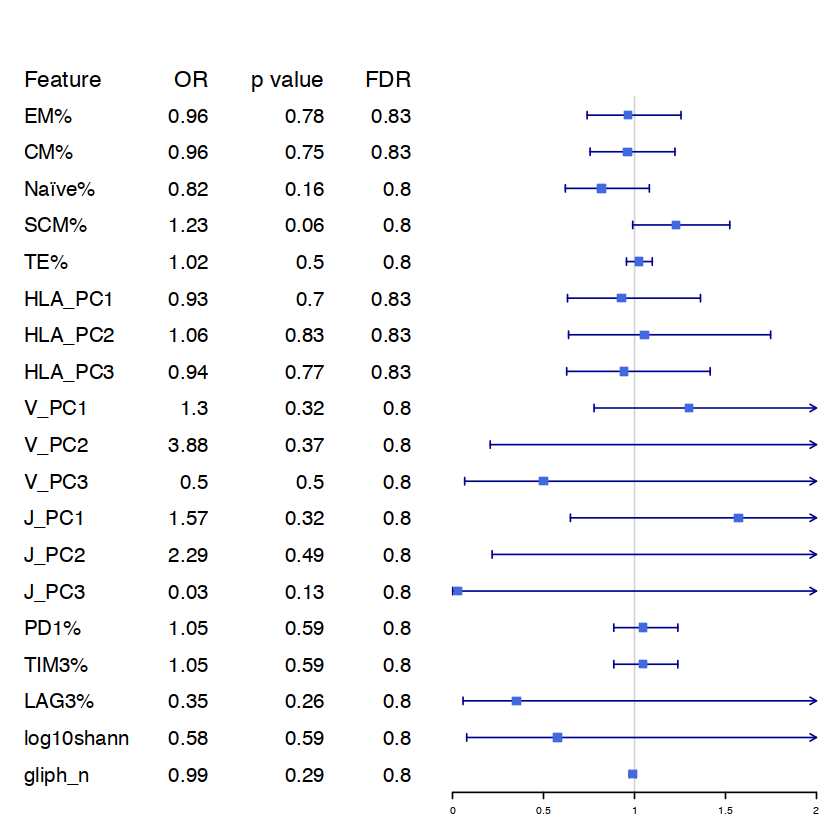

In [131]:
p3

In [132]:
pdf(paste0(plotpath, "forestplot_X01.pdf"), width=6, height=8)
p2
dev.off()

pdf 
  2

In [ ]:
pdf(file = paste0(plotpath,"Univar_forestplot.pdf"),
    width = 7, height = 10,
    useDingbats = FALSE, onefile = F)
forestplot(tabtext, hrs, new_page = TRUE, xlog = TRUE,
                   title = "Survival analysis (iMATRIX-atezo)(p-value, FDR)", boxsize = 0.25)
dev.off()

 # spiderplots - AUC

In [ ]:
meta_div$Relapse[ is.na(meta_div$Relapse) ] <- 0
meta_div$Relapse <- as.factor(meta_div$Relapse)

In [ ]:
cfdna <- meta_div[ which(meta_div$sampletype == "cfDNA"),]

In [ ]:
pbmc1 <- meta_div[ meta_div$sampletype == "PBMC" & !is.na(meta_div$CD3),]
pbmc1 <- pbmc1[ pbmc1$CD3 > 0,]

In [ ]:
pbmc1$cfTCR_shann <- cfdna[ match(pbmc1$sample_id, cfdna$sample_id), "log10shann"]

In [ ]:
pbmc1$cyclenum <- as.numeric(gsub("X0", "", pbmc1$cycle) )

In [ ]:
mytab <- table(pbmc1$Patient, pbmc1$cycle)
mytab <- mytab[rowSums(mytab == 1) > 1, ]
# baseline_patients <- rownames(mytab)[mytab[, 1] == 1]
df1 <- pbmc1[pbmc1$Patient %in% rownames(mytab), ]

In [ ]:
dim(df1)

In [ ]:
df1$cfTCR_shann <- cfdna[ match(df1$sample_id, cfdna$sample_id), "log10shann"]

In [ ]:
# result <- df1 %>%
#     group_by(Patient) %>%
#     mutate(DifferenceN = `Naïve%` - `Naïve%`[cycle == "X01"]) %>%
#     mutate(DifferenceCM = `CM%` - `CM%`[cycle == "X01"]) %>%
#     mutate(DifferenceSCM = `SCM%` - `SCM%`[cycle == "X01"]) %>%
#     mutate(DifferenceEM = `EM%` - `EM%`[cycle == "X01"]) %>%
#     mutate(DifferenceTE = `TE%` - `TE%`[cycle == "X01"]) %>%
#     mutate(DifferenceLAG = `LAG3%` - `LAG3%`[cycle == "X01"]) %>%
#     mutate(DifferenceTIM = `TIM3%` - `TIM3%`[cycle == "X01"]) %>%
#     mutate(DifferencePD1 = `PD1%` - `PD1%`[cycle == "X01"]) %>%
#     mutate(DifferenceTCR = log10shann - log10shann[cycle == "X01"])  %>%
#     mutate(DifferencecfTCR = cfTCR_shann - cfTCR_shann[cycle == "X01"])


In [ ]:
library(pracma)

In [ ]:
result2 <- df1 %>%
    group_by(Patient) %>%
    mutate(AUC_N = trapz(cyclenum, `Naïve%`) / n() ) %>%
    mutate(AUC_CM = trapz(cyclenum, `CM%`) / n() ) %>%
    mutate(AUC_SCM = trapz(cyclenum, `SCM%`) / n()  ) %>%
    mutate(AUC_EM = trapz(cyclenum, `EM%`) / n() ) %>%
    mutate(AUC_TE = trapz(cyclenum, `TE%`) / n() ) %>%
    mutate(AUC_LAG = trapz(cyclenum, `LAG3%`) / n() ) %>%
    mutate(AUC_TIM = trapz(cyclenum, `TIM3%`) / n() ) %>%
    mutate(AUC_PD1 = trapz(cyclenum, `PD1%`) / n() ) %>%
    mutate(AUC_TCR = trapz(cyclenum, `log10shann`) / n() ) %>%
     mutate(AUC_cfTCR = trapz(cyclenum, cfTCR_shann) / n() ) %>%
    ungroup()

In [ ]:
mypts <- result2[ !duplicated(result2$Patient), ]
# mypts <- mypts[ !is.na(mypts$AUC_TCR), ]

In [ ]:
# pca <- readr::read_rds(paste0(datapath, "/HLA/INT_HLA_PCA_postqc.rds"))

In [ ]:
# rownames(pca) <- paste0("CHP_", "", rownames(pca))
# rownames(pca) <- gsub("-.*", "", rownames(pca))

In [ ]:
# head(pca)

In [ ]:
# mypts$HLA_PC1 <- pca[ match(mypts$Patient, rownames(pca)), "PC1"]
# mypts$HLA_PC2 <- pca[ match(mypts$Patient, rownames(pca)), "PC2"]
# mypts$HLA_PC3 <- pca[ match(mypts$Patient, rownames(pca)), "PC3"]

In [ ]:
head(mypts)

In [ ]:
# myfit0 <- lm(AUC_TCR ~  HLA_PC2 + HLA_PC3 + cancergroup + Age, data= mypts)
# myfit1 <- lm(AUC_TCR ~  HLA_PC1 + HLA_PC2 + HLA_PC3 + cancergroup + Age, data= mypts)

# anova(myfit0, myfit1)

In [ ]:
# summary.lm(myfit1)

In [ ]:
# result_noX01 <- result[ result$cycle != "X01", ]

In [ ]:
# pbmc <- pbmc[ pbmc$CD3 > 0,]

In [ ]:
tmp <- mypts[!is.na(mypts$AUC_cfTCR),]

In [ ]:
mymat <- as.matrix(tmp[ , c( "AUC_N", "AUC_SCM", "AUC_CM", "AUC_EM", "AUC_TE", "AUC_LAG", "AUC_PD1", "AUC_cfTCR")])

In [ ]:
rownames(mymat) <- tmp$Patient

In [ ]:
makematrix_4hm <- function(df, var, name ){
    mymat <- df[[var]]
names(mymat) <- df[["Patient"]]
mymat <- t(as.matrix(mymat))
rownames(mymat) <- name
    
    return(mymat)
}

In [ ]:
mycohort <- makematrix_4hm(tmp, "Disease_type", "disease")
mysample <- makematrix_4hm(tmp, "cancergroup", "cancergroup")
mygroup <- makematrix_4hm(tmp, "Relapse", "Relapse")

In [ ]:
myatc <- makematrix_4hm(tmp, "ATC", "ATC")

In [ ]:
myage <- makematrix_4hm(tmp, "Age", "Age")

In [ ]:
age_col <- c("blue", "red")
atc_col <- c("blue", "red")

In [ ]:
group_col <- c("blue", "red", "green")
names(group_col) <- names(table(tmp$Relapse))

In [ ]:
# cohort_col <- c("blue", "red", "green", "orange", "purple", "yellow", "black", "grey", "pink", 
# "brown", "cyan", "magenta", "navy", "maroon", "gray","gold", "darkgreen") 
# names(cohort_col) <- names(table(allpbmcs$Disease_type))

In [ ]:
type_col <- c("blue", "red", "green", "orange", "purple")
names(type_col) <- names(table(tmp$cancergroup))

In [ ]:
library(ComplexHeatmap)

In [ ]:
age_hm <- Heatmap(myage, col = age_col,  height = unit(1,"cm"))
atc_hm <- Heatmap(myatc, col = atc_col,  height = unit(1,"cm"))

In [ ]:
cohort_hm <- Heatmap(mycohort, col = cohort_col, height = unit(1,"cm"))
sample_hm <- Heatmap(mysample, col = type_col, , height = unit(1,"cm"))
group_hm <- Heatmap(mygroup, col = group_col, , height = unit(1,"cm"))

In [ ]:
hm <- Heatmap(t(scale(mymat)))

In [ ]:
hm %v%  sample_hm %v% group_hm %v% age_hm %v%  atc_hm

In [ ]:
fit1 <- lmerTest::lmer( Relapse ~ AUC_N + AUC_TE + AUC_LAG + AUC_TCR + (1 | Patient), data = mypts)


In [ ]:
# logistic regression
mypts$Relapse <- as.factor(mypts$Relapse)
mypts$Relapse <- relevel(mypts$Relapse, ref = "0")

In [ ]:
fit1 <- lmerTest::lmer( Relapse ~ AUC_N + AUC_TE + AUC_LAG + AUC_TCR + (1 | Patient), data = mypts)

fit2 <- lme4::glmer( Relapse ~ AUC_N + AUC_TE + AUC_LAG + (1 | Patient), data = mypts, family = binomial)

In [ ]:
lmer

In [ ]:
anova(fit1)

In [ ]:
anova(fit1, fit2)

# Perturbation scores

In [ ]:
cfdna <- meta_div[ which(meta_div$sampletype == "cfDNA"),]

In [ ]:
pbmc1 <- meta_div[ meta_div$sampletype == "PBMC" & !is.na(meta_div$CD3),]
pbmc1 <- pbmc1[ pbmc1$CD3 > 0,]

In [ ]:
pbmc1$cfTCR_shann <- cfdna[ match(pbmc1$sample_id, cfdna$sample_id), "log10shann"]

In [ ]:
pbmc1$cyclenum <- as.numeric(gsub("X0", "", pbmc1$cycle) )

In [ ]:
pbmc1$scaled_N <- scale(pbmc1$`Naïve%`)
pbmc1$scaled_CM <- scale(pbmc1$`CM%`)
pbmc1$scaled_SCM <- scale(pbmc1$`SCM%`)
pbmc1$scaled_EM <- scale(pbmc1$`EM%`)
pbmc1$scaled_TE <- scale(pbmc1$`TE%`)
pbmc1$scaled_LAG <- scale(pbmc1$`LAG3%`)
pbmc1$scaled_TIM <- scale(pbmc1$`TIM3%`)
pbmc1$scaled_PD1 <- scale(pbmc1$`PD1%`)
pbmc1$scaled_TCR <- scale(pbmc1$log10shann)
pbmc1$scaled_cfTCR <- scale(pbmc1$cfTCR_shann)

In [ ]:
mytab <- table(pbmc1$Patient, pbmc1$cycle)
mytab <- mytab[rowSums(mytab == 1) > 1, ]
# baseline_patients <- rownames(mytab)[mytab[, 1] == 1]
df1 <- pbmc1[pbmc1$Patient %in% rownames(mytab), ]

In [ ]:
dim(df1)

In [ ]:
rownames(df1) <- df1$sample_id

In [ ]:
result$Relapse[ is.na(result$Relapse) ] <- 0
result$Relapse <- as.factor(result$Relapse)

In [ ]:
result2 <- df1 %>%
    group_by(Patient) %>%
    mutate(AUC_N = trapz(cyclenum, scaled_N) / n() ) %>%
    mutate(AUC_CM = trapz(cyclenum, scaled_CM) / n() ) %>%
    mutate(AUC_SCM = trapz(cyclenum, scaled_SCM) / n()  ) %>%
    mutate(AUC_EM = trapz(cyclenum, scaled_EM) / n() ) %>%
    mutate(AUC_TE = trapz(cyclenum, scaled_TE) / n() ) %>%
    mutate(AUC_LAG = trapz(cyclenum, scaled_LAG) / n() ) %>%
    mutate(AUC_TIM = trapz(cyclenum, scaled_TIM) / n() ) %>%
    mutate(AUC_PD1 = trapz(cyclenum, scaled_PD1) / n() ) %>%
    mutate(AUC_TCR = trapz(cyclenum, scaled_TCR) / n() ) %>%
    mutate(AUC_cfTCR = trapz(cyclenum, scaled_cfTCR) / n() ) %>%
    ungroup()

In [ ]:
mypts <- result2[ !duplicated(result2$Patient), ]
# mypts <- mypts[ !is.na(mypts$AUC_TCR), ]

In [ ]:
mypts <- as.data.frame(mypts)

In [ ]:
rownames(mypts) <- mypts$sample_id

In [ ]:
# result <- as.data.frame(result)
# rownames(result) <- result$sample_id

In [ ]:
tmp <- as.data.frame(c(mean(mypts$AUC_N), mypts$AUC_N ) )
rownames(tmp) <- c("mean", rownames(mypts))
mypts$dist_N <- as.matrix(dist(tmp))[-1,1]

tmp <- as.data.frame(c(mean(mypts$AUC_CM), mypts$AUC_CM ) )
rownames(tmp) <- c("mean", rownames(mypts))
mypts$dist_CM <- as.matrix(dist(tmp))[-1,1]

tmp <- as.data.frame(c(mean(mypts$AUC_SCM), mypts$AUC_SCM ) )
rownames(tmp) <- c("mean", rownames(mypts))
mypts$dist_SCM <- as.matrix(dist(tmp))[-1,1]

tmp <- as.data.frame(c(mean(mypts$AUC_EM), mypts$AUC_EM ) )
rownames(tmp) <- c("mean", rownames(mypts))
mypts$dist_EM <- as.matrix(dist(tmp))[-1,1]

tmp <- as.data.frame(c(mean(mypts$AUC_TE), mypts$AUC_TE ) )
rownames(tmp) <- c("mean", rownames(mypts))
mypts$dist_TE <- as.matrix(dist(tmp))[-1,1]

tmp <- as.data.frame(c(mean(mypts$AUC_LAG, na.rm = T), mypts$AUC_LAG ) )
rownames(tmp) <- c("mean", rownames(mypts))
mypts$dist_LAG <- as.matrix(dist(tmp))[-1,1]

tmp <- as.data.frame(c(mean(mypts$AUC_TIM, na.rm = T), mypts$AUC_TIM ) )
rownames(tmp) <- c("mean", rownames(mypts))
mypts$dist_TIM <- as.matrix(dist(tmp))[-1,1]

tmp <- as.data.frame(c(mean(mypts$AUC_PD1, na.rm = T), mypts$AUC_PD1 ) )
rownames(tmp) <- c("mean", rownames(mypts))
mypts$dist_PD1 <- as.matrix(dist(tmp))[-1,1]

tmp <- as.data.frame(c(mean(mypts$AUC_TCR, na.rm = T), mypts$AUC_TCR ) )
rownames(tmp) <- c("mean", rownames(mypts))
mypts$dist_TCR <- as.matrix(dist(tmp))[-1,1]

tmp <- as.data.frame(c(mean(mypts$AUC_cfTCR, na.rm = T), mypts$AUC_cfTCR ) )
rownames(tmp) <- c("mean", rownames(mypts))
mypts$dist_cfTCR <- as.matrix(dist(tmp))[-1,1]

In [ ]:
head(mypts)

In [ ]:
head(mypts$Relapse)

In [ ]:
# logistic regression
mypts$Relapse <- as.factor(mypts$Relapse)
mypts$Relapse <- relevel(mypts$Relapse, ref = "0")

rms::lrm( Relapse ~ (dist_N + dist_TE + dist_PD1)^3 + cancergroup, data = mypts)

In [ ]:
tmp <- mypts#[!is.na(mypts$AUC_cfTCR),]

In [ ]:
mymat <- as.matrix(tmp[ , c( "dist_N", "dist_CM", "dist_SCM", "dist_EM", "dist_TE", "dist_LAG", "dist_TIM", "dist_PD1")])

In [ ]:
rownames(mymat) <- tmp$Patient

In [ ]:
makematrix_4hm <- function(df, var, name ){
    mymat <- df[[var]]
names(mymat) <- df[["Patient"]]
mymat <- t(as.matrix(mymat))
rownames(mymat) <- name
    
    return(mymat)
}

In [ ]:
mycohort <- makematrix_4hm(tmp, "Disease_type", "disease")
mysample <- makematrix_4hm(tmp, "cancergroup", "cancergroup")
mygroup <- makematrix_4hm(tmp, "Relapse", "Relapse")

In [ ]:
myatc <- makematrix_4hm(tmp, "ATC", "ATC")

In [ ]:
myage <- makematrix_4hm(tmp, "Age", "Age")

In [ ]:
age_col <- c("blue", "red")
atc_col <- c("blue", "red")

In [ ]:
group_col <- c("blue", "red", "green")
names(group_col) <- names(table(tmp$Relapse))

In [ ]:
# cohort_col <- c("blue", "red", "green", "orange", "purple", "yellow", "black", "grey", "pink", 
# "brown", "cyan", "magenta", "navy", "maroon", "gray","gold", "darkgreen") 
# names(cohort_col) <- names(table(allpbmcs$Disease_type))

In [ ]:
type_col <- c("blue", "red", "green", "orange", "purple")
names(type_col) <- names(table(tmp$cancergroup))

In [ ]:
library(ComplexHeatmap)

In [ ]:
age_hm <- Heatmap(myage, col = age_col,  height = unit(1,"cm"))
atc_hm <- Heatmap(myatc, col = atc_col,  height = unit(1,"cm"))

In [ ]:
cohort_hm <- Heatmap(mycohort, col = cohort_col, height = unit(1,"cm"))
sample_hm <- Heatmap(mysample, col = type_col, , height = unit(1,"cm"))
group_hm <- Heatmap(mygroup, col = group_col, , height = unit(1,"cm"))

In [ ]:
hm <- Heatmap(t(scale(mymat)))

In [ ]:
hm %v%  sample_hm %v% group_hm %v% age_hm %v%  atc_hm